In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn import preprocessing
import matplotlib.pylab as plt


In [3]:
####### PCA on the two variables calories and rating
cereals_df = pd.read_csv(".//Cereals.csv")
cereals_df.head()
#cereals_df.dtypes
#cereals_df.shape


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [4]:
pcs = PCA(n_components=2)
pcs.fit(cereals_df[["calories", "rating"]])
pcsSummary = pd.DataFrame({"Standard deviation": np.sqrt(pcs.explained_variance_),"Proportion of variance": pcs.explained_variance_ratio_,"Cumulative proportion": np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ["PC1", "PC2"]
pcsSummary.round(4)


,PC1,PC2
Standard deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


In [5]:
# Components
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=["PC1", "PC2"],
index=["calories", "rating"])
pcsComponents_df


,PC1,PC2
calories,0.847053,0.531508
rating,-0.531508,0.847053


In [6]:
# Scores
scores = pd.DataFrame(pcs.transform(cereals_df[["calories", "rating"]]),
columns=["PC1","PC2"])
scores.head()


,PC1,PC2
0,-44.921528,2.197183
1,15.725265,-0.382416
2,-40.149935,-5.407212
3,-75.310772,12.999126
4,7.041508,-5.357686


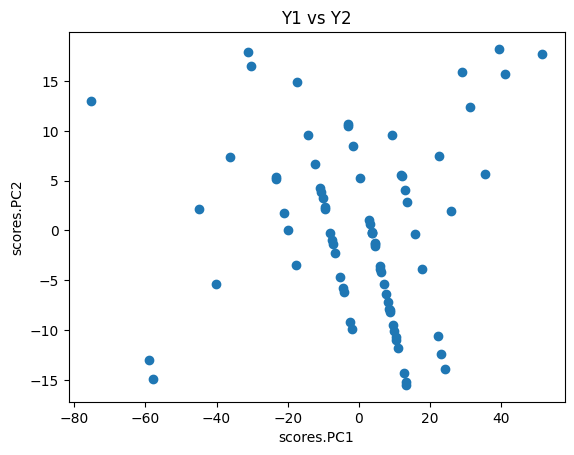

In [7]:
plt.plot(scores.PC1[:],scores.PC2[:],'o')
plt.xlabel('scores.PC1') 
plt.ylabel('scores.PC2') 
plt.title('Y1 vs Y2') 
plt.show()


In [9]:
cereals_df = pd.read_csv(".//Cereals.csv")
#cereals_df.head()
#cereals_df.shape
#cereals_df.dtypes


In [10]:
####### PCA with scale
pcs = PCA()
#pcs.fit(cereals_df.iloc[:, 3:].dropna(axis=0))
pcs.fit(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0)))
pcsSummary_df = pd.DataFrame({"Standard deviation": np.sqrt(pcs.explained_variance_),"Proportion of variance": pcs.explained_variance_ratio_,"Cumulative proportion": np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = [f"P{i}" for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0


In [11]:
#### Components 
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:8]


,P1,P2,P3,P4,P5,P6,P7,P8
calories,-0.299542,0.393148,0.114857,-0.204359,0.203899,-0.255906,-0.025595,-0.002477
protein,0.307356,0.165323,0.277282,-0.300743,0.319749,0.120752,0.282705,-0.426632
fat,-0.039915,0.345724,-0.204890,-0.186833,0.586893,0.347967,-0.051155,0.063050
sodium,-0.183397,0.137221,0.389431,-0.120337,-0.338364,0.664372,-0.283703,0.176720
fiber,0.453490,0.179812,0.069766,-0.039174,-0.255119,0.064244,0.112325,0.216216
carbo,-0.192449,-0.149448,0.562452,-0.087835,0.182743,-0.326393,-0.260468,0.167436
sugars,-0.228068,0.351434,-0.355405,0.022707,-0.314872,-0.152082,0.227985,-0.063088
potass,0.401964,0.300544,0.067620,-0.090878,-0.148360,0.025154,0.148808,0.262222
vitamins,-0.115980,0.172909,0.387859,0.604111,-0.049287,0.129486,0.294276,-0.457041
shelf,0.171263,0.265050,-0.001531,0.638879,0.329101,-0.052044,-0.174834,0.414146


In [12]:
# Scores
cereals_df_1 = pd.DataFrame(cereals_df.iloc[:,3:].dropna(axis=0)) #,columns=["PC1","PC2","PC3"])
scores = pd.DataFrame(pcs.transform(cereals_df_1))
scores.head()


C:\Users\love_\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,98.587389,121.970059,102.305208,-43.250032,-69.403539,64.409143,16.694852,88.278460,-28.344507,-91.168612,154.800038,-40.975465,130.248322
1,28.901046,86.494632,36.918610,-40.618868,4.533929,-25.725968,15.713301,40.380645,-16.895141,-87.098853,61.889427,-57.541859,72.660262
2,86.278566,153.258540,155.414106,-62.344236,-118.906794,152.889843,-15.665046,121.788597,-6.688264,-97.940130,175.966506,-40.241647,159.541190
3,136.529161,121.922587,116.211888,-46.257311,-81.975559,72.578077,21.893812,105.351947,-38.930228,-90.861811,186.170102,-34.160664,149.592644
4,-30.972986,89.677126,105.479606,-37.808863,-47.995701,86.651786,-33.659333,40.495705,21.030887,-73.182285,4.923310,-35.368260,99.519020


C:\Users\love_\AppData\Local\Temp\ipykernel_46608\2725063976.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(xline, yline, zline, cmap='Greens')


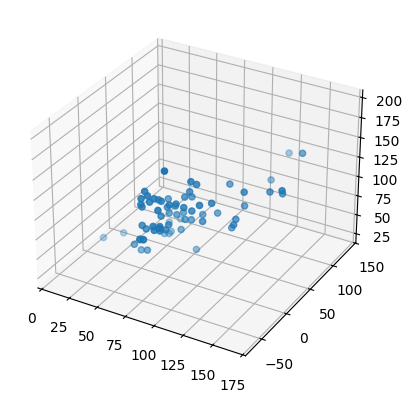

In [13]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
zline = scores.iloc[:,2]
xline = scores.iloc[:,1]
yline = scores.iloc[:,0]
ax.scatter3D(xline, yline, zline, cmap='Greens')


In [16]:
####### Sparse PCA
from numpy import reshape
spca = SparsePCA( random_state=0,alpha=1e-3, ridge_alpha=1e-6) # Solve sparse pca
spca.fit(cereals_df.iloc[:, 3:].dropna(axis=0))
pcsComponents_df = pd.DataFrame(spca.components_.transpose(), columns=pcsSummary_df.columns,index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:5]


,P1,P2,P3,P4,P5
calories,0.067947,0.000000,0.639447,-0.614694,0.777285
protein,0.000000,0.007252,0.000244,0.001581,0.058241
fat,0.000000,0.001224,0.008750,-0.022694,-0.001412
sodium,0.984081,0.139967,-0.142619,0.000000,0.000000
fiber,-0.000048,0.025505,0.000000,0.002434,-0.016651
carbo,0.015625,-0.014361,0.015666,0.023999,0.491564
sugars,0.000000,0.000000,0.086528,-0.105798,-0.383670
potass,-0.134164,0.989578,0.034575,-0.039544,-0.048054
vitamins,0.093396,0.015051,0.749467,0.779933,-0.031763
shelf,-0.000223,0.002771,0.007849,0.000000,0.000000


In [17]:
Q,R =np.linalg.qr(spca.components_)
R2=np.diag(R)*np.diag(R)
arr1 = np.argsort(R2)[::-1]
R2_=R2[arr1]
pcsComponents_df_=spca.components_.copy()


In [18]:
# calculo de r_yi_Xk
# pd.DataFrame(np.matmul(spca.components_.transpose(),np.diag(np.diag(np.cov(pd.DataFrame(spca.components_.transpose()))))))
pd.DataFrame(np.matmul(pcsComponents_df_,np.diag(np.diag(np.cov(pd.DataFrame(pcsComponents_df_))))))


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.005203,0.000000,0.000000,0.082003,-0.000004,0.001268,0.000000,-0.011113,0.007171,-0.000015,0.000000,0.000000,0.000000
1,0.000000,0.000541,0.000087,0.011663,0.002009,-0.001165,0.000000,0.081965,0.001156,0.000184,0.000000,0.000000,0.000000
2,0.048967,0.000018,0.000619,-0.011884,0.000000,0.001271,0.007018,0.002864,0.057542,0.000520,0.000000,0.000000,0.000000
3,-0.047072,0.000118,-0.001606,0.000000,0.000192,0.001948,-0.008581,-0.003275,0.059881,0.000000,0.000000,0.000000,0.000000
4,0.059522,0.004345,-0.000100,0.000000,-0.001311,0.039893,-0.031118,-0.003980,-0.002439,0.000000,0.000000,0.000000,0.000000
5,0.011986,0.009087,-0.007993,0.000000,0.022835,-0.047525,0.058533,0.000000,0.000000,-0.000573,0.000000,0.000000,0.000000
6,-0.002271,-0.019230,-0.023770,0.000000,-0.002043,0.056751,0.046523,0.000000,0.000000,-0.002269,0.000000,0.000000,0.000000
7,0.000000,0.051539,-0.003112,0.000000,-0.053289,0.000000,0.000000,0.000000,0.000000,-0.016629,0.000000,0.000000,0.000000
8,0.000000,0.006890,0.000000,0.000000,-0.005832,0.000000,0.000000,0.000000,0.000000,0.065825,0.000000,0.000000,0.000000
9,0.000000,0.020334,0.065683,0.000000,0.013527,0.007434,0.013180,0.000322,0.000000,0.000005,0.000000,0.000000,0.000000


In [19]:
pcsSummary_df_ = pd.DataFrame({"Standard deviation": np.sqrt(R2_),"Proportion of variance": np.divide(R2_,np.sum(R2_)),"Cumulative proportion": np.cumsum(np.divide(R2_,np.sum(R2_)))})
pcsSummary_df_ = pcsSummary_df_.transpose()
pcsSummary_df_.columns = ["PC".format(i) for i in range(1, len(pcsSummary_df_.columns) + 1)]
pcsSummary_df_.round(4)


,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC
Standard deviation,1.1973,1.0904,1.0846,1.0159,1.0040,0.9992,0.9971,0.9242,0.9242,0.8010,0.7008,0.5180,0.4596
Proportion of variance,0.1286,0.1066,0.1055,0.0925,0.0904,0.0895,0.0891,0.0766,0.0766,0.0575,0.0440,0.0241,0.0189
Cumulative proportion,0.1286,0.2352,0.3406,0.4332,0.5236,0.6131,0.7022,0.7788,0.8554,0.9130,0.9570,0.9811,1.0000


In [20]:
####
pcsComponents_df__ = pd.DataFrame(spca.components_.transpose(), columns=pcsSummary_df_.columns,index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df__.iloc[:,:6]


,PC,PC,PC,PC,PC,PC
calories,0.067947,0.000000,0.639447,-0.614694,0.777285,0.156521
protein,0.000000,0.007252,0.000244,0.001581,0.058241,0.121802
fat,0.000000,0.001224,0.008750,-0.022694,-0.001412,-0.112947
sodium,0.984081,0.139967,-0.142619,0.000000,0.000000,0.000000
fiber,-0.000048,0.025505,0.000000,0.002434,-0.016651,0.289966
carbo,0.015625,-0.014361,0.015666,0.023999,0.491564,-0.585596
sugars,0.000000,0.000000,0.086528,-0.105798,-0.383670,0.721686
potass,-0.134164,0.989578,0.034575,-0.039544,-0.048054,0.000000
vitamins,0.093396,0.015051,0.749467,0.779933,-0.031763,0.000000
shelf,-0.000223,0.002771,0.007849,0.000000,0.000000,-0.008651
